In [114]:
#importing the libraries used
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [115]:
#reading the dataset
book_tags=pd.read_csv("/Users/nimitt/Documents/ImpLibrs/book_tags.csv")
books=pd.read_csv("/Users/nimitt/Documents/ImpLibrs/books.csv")
ratings=pd.read_csv("/Users/nimitt/Documents/ImpLibrs/ratings.csv")
tags=pd.read_csv("/Users/nimitt/Documents/ImpLibrs/tags.csv")
to_read=pd.read_csv("/Users/nimitt/Documents/ImpLibrs/to_read.csv")

In [116]:
#Counting Number of ratings
print(f"Number of ratings:\t{len(ratings)}")
print(f"Number of Users :\t{len(ratings['user_id'].unique())}")

Number of ratings:	5976479
Number of Users :	53424


In [134]:
#Counting number of tags
print(len(tags),": number of tags")
print(len(book_tags),": number of user-tag-book combinations")

34252 : number of tags
999912 : number of user-tag-book combinations


count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


<AxesSubplot: ylabel='rating'>

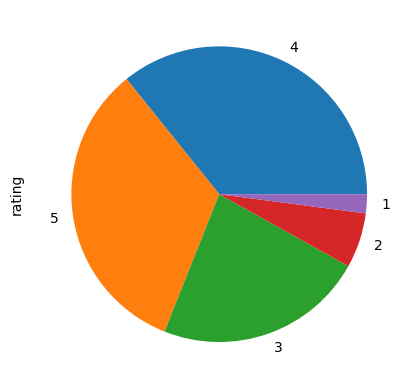

In [117]:
#Finding the average rating
print(ratings['rating'].describe())
ratings['rating'].value_counts().plot(kind='pie')

In [118]:
#Calculating Number of ratings per user
ratings_per_user=ratings['user_id'].value_counts().describe()
ratings_per_user

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [ ]:
#Creating histogram to plot Yearwise number of publications
plt.hist(books['original_publication_year'].where(books['original_publication_year']>1800),bins=30)
plt.xlabel('Year')
plt.ylabel('Number of books published')
plt.show()

In [ ]:
#Checking the year with most number of books published
most_books_year=pd.DataFrame(books['original_publication_year'].value_counts())
most_books_year.rename(columns={'original_publication_year':'Number of books'},inplace=True)
most_books_year=most_books_year.head(20)
print(most_books_year.head(10))
plt.bar(most_books_year.index,most_books_year['Number of books'])
plt.xlabel('Year')
plt.ylabel('Number of books')

In [ ]:
#finding the most marked books
most_marked_books=pd.DataFrame(to_read['book_id'].value_counts().head(200))
most_marked_books.rename(columns={'book_id':'Number of Users marked'},inplace=True)
most_marked_books['book_id']=most_marked_books.index
most_marked_books.head(10)

In [ ]:
#Calculating the how many books has each user marked to read
to_read['user_id'].value_counts().describe()

In [ ]:
#Calculating favorite books
cond=np.logical_or(ratings['rating']==4,ratings['rating']==5)
number_of_ratings=pd.DataFrame(ratings['book_id'].where(cond).value_counts())
number_of_ratings.rename(columns={'book_id':'Number of 4 or 5 ratings'},inplace=True)
print(number_of_ratings)
plt.scatter(number_of_ratings.index,number_of_ratings["Number of 4 or 5 ratings"],s=0.1)
plt.xlabel('book_id')
plt.ylabel('Number of 4 or 5 Ratings')

In [ ]:
#average rating of each book
group=ratings.groupby('book_id')['rating'].mean()
group.sort_values(ascending=False).head(50)
group.sort_values()


In [ ]:
#Finding the most popular tags
book_tags_1=book_tags.merge(tags,on='tag_id')
book_tags_1=book_tags_1.merge(books[['goodreads_book_id','title']],on='goodreads_book_id')
book_tags_1.loc[ book_tags_1['count'] < 0, 'count'] = 0
print(book_tags_1)
print(book_tags_1['count'].describe())
book_tags_1['tag_name'].value_counts().head(20)

In [ ]:
#Number of tags given by each user to books
book_tags_1['goodreads_book_id'].value_counts().describe()

In [ ]:
books

In [ ]:

#counting number of books each year
books['original_publication_year'].value_counts()

In [ ]:
#finding the most profolic authors
books_authors=pd.DataFrame(books['authors'].value_counts())
books_authors=books_authors.rename(columns = {'authors':'#publications'})
books_authors.head(10)

In [ ]:
#plotting rating vs year
cond1=books['original_publication_year']>1800
plt.scatter(books['original_publication_year'].where(cond1),books['ratings_count'])
plt.xlabel('Year of Publication of Book')
plt.ylabel('Number of Ratings')
